#Business Understanding

#Project Domain
Proyek ini berada dalam domain pemasaran digital dan perilaku konsumen, dengan fokus pada analisis perilaku pembelian konsumen berdasarkan data iklan di media sosial. Pemahaman terhadap perilaku konsumen sangat penting untuk meningkatkan efektivitas strategi pemasaran dan pengambilan keputusan bisnis dalam dunia e-commerce dan periklanan digital.

#Problem Statements
Banyak perusahaan kesulitan dalam memahami faktor-faktor yang mempengaruhi keputusan pembelian konsumen di platform digital. Tanpa wawasan yang tepat, kampanye iklan bisa menjadi tidak efektif dan menyebabkan kerugian biaya. Tidak adanya sistem prediktif yang akurat membuat bisnis sulit untuk mengidentifikasi target konsumen potensial berdasarkan karakteristik seperti usia dan pendapatan.

#Goals
Tujuan dari proyek ini adalah:

Membangun model Machine Learning untuk memprediksi kemungkinan seorang pengguna melakukan pembelian (ya atau tidak) berdasarkan variabel seperti usia dan estimasi pendapatan. Model ini bertujuan untuk memberikan insight kepada pelaku bisnis dalam merancang strategi iklan yang lebih terarah dan efisien, serta memahami perilaku konsumen terhadap iklan di media sosial.

## Import Library yang dibutuhkan

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [126]:
# Load data
df = pd.read_csv("social_ads.csv")

In [127]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


## Exploratory Data Analysis

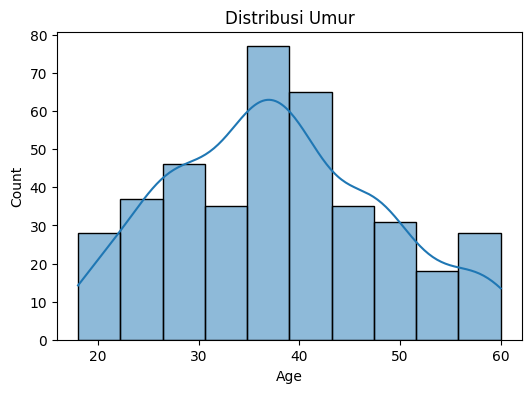

In [128]:
# Plot 1: Distribusi Umur
plt.figure(figsize=(6,4))
sns.histplot(df["Age"], bins=10, kde=True)
plt.title("Distribusi Umur")
plt.show()

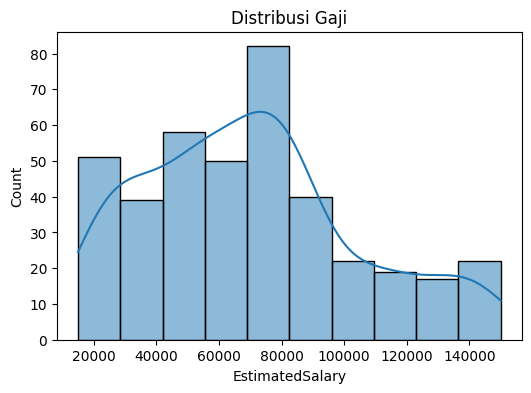

In [129]:
# Plot 2: Distribusi Gaji
plt.figure(figsize=(6,4))
sns.histplot(df["EstimatedSalary"], bins=10, kde=True)
plt.title("Distribusi Gaji")
plt.show()


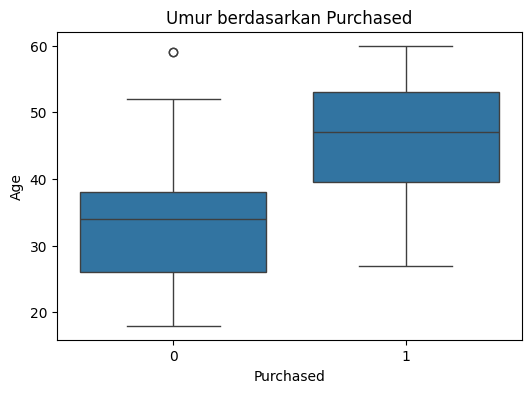

In [130]:
# Plot 3: Perbandingan Umur vs Purchased
plt.figure(figsize=(6,4))
sns.boxplot(x="Purchased", y="Age", data=df)
plt.title("Umur berdasarkan Purchased")
plt.show()

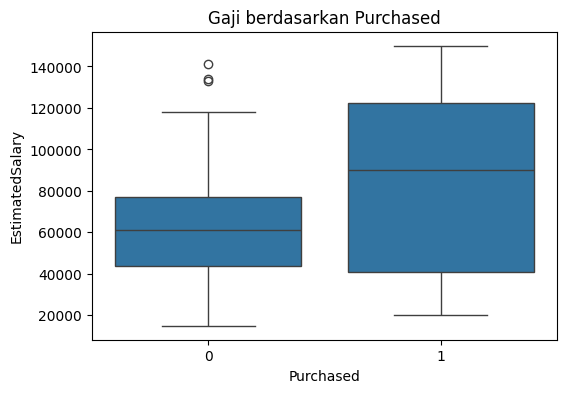

In [131]:
# Plot 4: Perbandingan Gaji vs Purchased
plt.figure(figsize=(6,4))
sns.boxplot(x="Purchased", y="EstimatedSalary", data=df)
plt.title("Gaji berdasarkan Purchased")
plt.show()

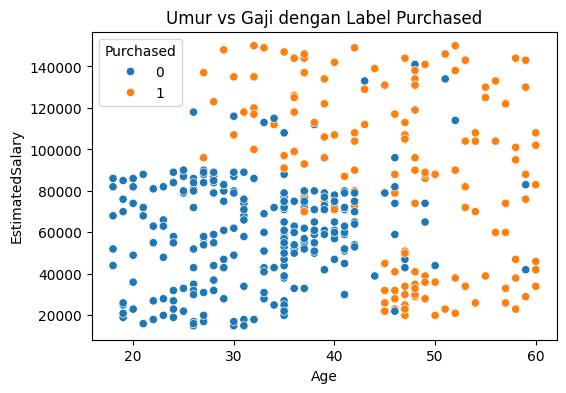

In [132]:
# Plot 5: Scatterplot Umur vs Gaji berwarna berdasarkan Purchased
plt.figure(figsize=(6,4))
sns.scatterplot(x="Age", y="EstimatedSalary", hue="Purchased", data=df)
plt.title("Umur vs Gaji dengan Label Purchased")
plt.show()

## Data Preparation (Scaling & Splitting)

In [133]:
# Fitur dan label
X = df[["Age", "EstimatedSalary"]]
y = df["Purchased"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



## Modeling

In [134]:
# 5. Bangun model ANN
model = Sequential([
    Dense(16, input_dim=2, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 6. Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 7. Callback untuk EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 8. Latih model
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)



c:\Users\muhamad fajar\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7656 - loss: 0.6235 - val_accuracy: 0.8125 - val_loss: 0.6241
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7733 - loss: 0.6017 - val_accuracy: 0.8281 - val_loss: 0.6022
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7870 - loss: 0.5643 - val_accuracy: 0.8438 - val_loss: 0.5802
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8218 - loss: 0.5443 - val_accuracy: 0.8594 - val_loss: 0.5576
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8665 - loss: 0.5156 - val_accuracy: 0.8750 - val_loss: 0.5352
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8862 - loss: 0.4991 - val_accuracy: 0.8906 - val_loss: 0.5115
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8639 - loss: 0.4902 - val_accuracy: 0.8906 - val_loss: 0.4878
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8715 - loss: 0.4725 - val_accuracy: 0.890

## Evaluation


Akurasi model pada data test: 93.75%


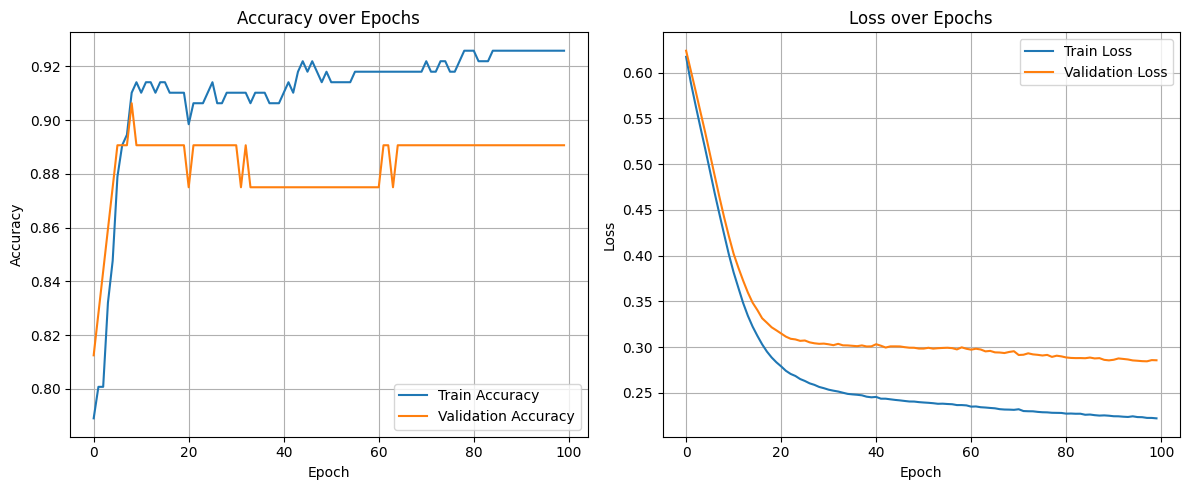

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
✅ Akurasi Test: 93.75%
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        52
           1       0.87      0.96      0.92        28

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.93        80
weighted avg       0.94      0.94      0.94        80



In [135]:
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Akurasi model pada data test: {accuracy * 100:.2f}%")

# 10. Visualisasi akurasi dan loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 11. Prediksi dan evaluasi
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

final_accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Akurasi Test: {final_accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))

## save Model 

In [136]:
import joblib

# Simpan scaler
joblib.dump(scaler, "scaler.pkl")
print("Scaler berhasil disimpan sebagai scaler.pkl")

Scaler berhasil disimpan sebagai scaler.pkl


In [ ]:
# Simpan model ke file
import keras
model.save("model_prediksi_konsumen.keras")

